# IMDB 리뷰 감성 분류하기(IMDB Movie Review Sentiment Analysis)

논문 링크 : http://ai.stanford.edu/~amaas/papers/wvSent_acl2011.pdf

영화 사이트 IMDB의 리뷰 데이터입니다. 이 데이터는 리뷰에 대한 텍스트와 해당 리뷰가 긍정인 경우 1을 부정인 경우 0으로 표시한 레이블로 구성된 데이터입니다.

### IMDB 리뷰 데이터에 대한 이해

In [2]:
from tensorflow.keras.datasets import imdb
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 1s 0us/step


In [4]:
print('훈련용 리뷰 개수 : {}'.format(len(X_train)))
print('테스트용 리뷰 개수 : {}'.format(len(X_test)))
num_classes = max(y_train) + 1
print('카테고리 : {}'.format(num_classes))

훈련용 리뷰 개수 : 25000
테스트용 리뷰 개수 : 25000
카테고리 : 2


In [5]:
print(X_train[0])
print(y_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [8]:
print('리뷰의 최대 길이 : {}'.format(max(len(l) for l in X_train)))
print('리뷰의 평균 길이 : {}'.format(sum(map(len, X_train))/ len(X_train)))

리뷰의 최대 길이 : 2494
리뷰의 평균 길이 : 238.71364


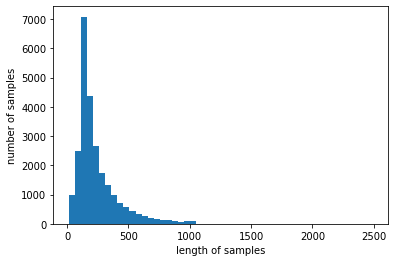

In [9]:
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [10]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print('각 레이블에 대한 빈도수')
print(np.asarray((unique_elements, counts_elements)))

각 레이블에 대한 빈도수
[[    0     1]
 [12500 12500]]


In [11]:
word_to_index = imdb.get_word_index()
index_to_word = {}
for key, value in word_to_index.items():
    index_to_word[value] = key

1646592/1641221 [==============================] - 0s 0us/step


In [12]:
print('빈도수 상위 1번 단어 : {}'.format(index_to_word[1]))

빈도수 상위 1번 단어 : the


In [13]:
print(' '.join([index_to_word[X] for X in X_train[0]]))

the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have tw

### LSTM으로 IMDB 리뷰 감성 분류하기

In [14]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [15]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

In [16]:
max_len = 100
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [18]:
model = Sequential()
model.add(Embedding(5000, 120))
model.add(LSTM(120))
model.add(Dense(1, activation='sigmoid'))

In [23]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=64)
scores = model.evaluate(X_test, y_test, verbose=0) # 테스트 데이터에 대해서 정확도 평가
print("정확도: %.2f%%" % (scores[1]*100))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 135s 5ms/sample - loss: 0.4216 - accuracy: 0.8048 - val_loss: 0.3697 - val_accuracy: 0.8340
Epoch 2/5
25000/25000 [==============================] - 125s 5ms/sample - loss: 0.2929 - accuracy: 0.8779 - val_loss: 0.3453 - val_accuracy: 0.8507
Epoch 3/5
25000/25000 [==============================] - 107s 4ms/sample - loss: 0.2387 - accuracy: 0.9041 - val_loss: 0.3923 - val_accuracy: 0.8407
Epoch 4/5
25000/25000 [==============================] - 99s 4ms/sample - loss: 0.1919 - accuracy: 0.9250 - val_loss: 0.3950 - val_accuracy: 0.8285
Epoch 5/5
25000/25000 [==============================] - 94s 4ms/sample - loss: 0.1633 - accuracy: 0.9379 - val_loss: 0.4777 - val_accuracy: 0.8338
정확도: 83.38%
